In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(array([ 10.,  53., 681., 638., 217.]),
 array([3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 5 artists>)

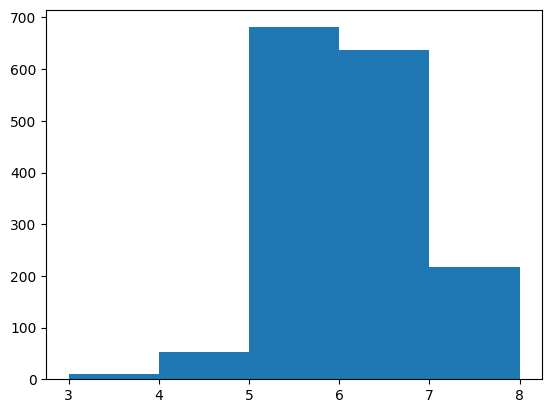

In [45]:
plt.hist(df.quality,bins = 5)


In [46]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

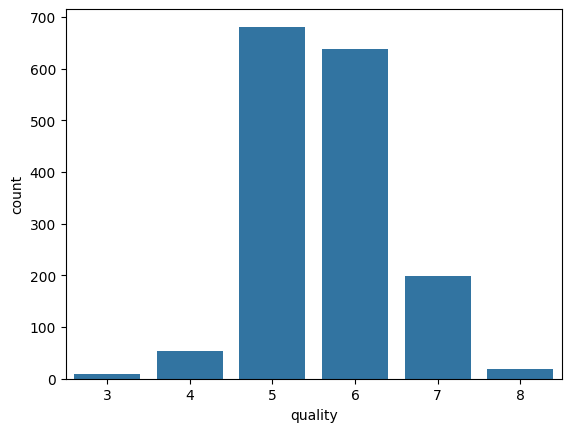

In [8]:
sns.countplot(x = "quality",data = df)

In [47]:
from scipy.stats import normaltest
normaltest(df.quality.values)

NormaltestResult(statistic=17.26240081635554, pvalue=0.0001784503033385499)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c57565af60>,
 'caps': [<matplotlib.lines.Line2D at 0x1c57565b470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c57565adb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c57565b9e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c57565bc80>],
 'means': []}

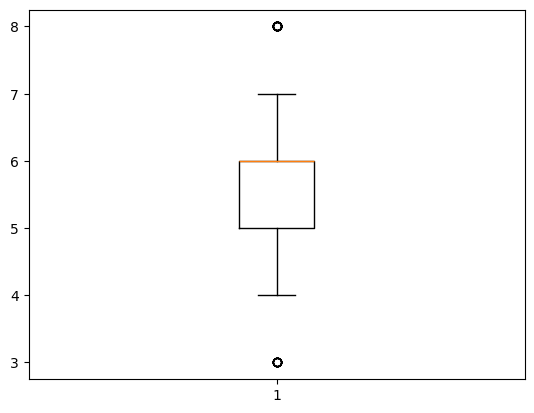

In [48]:
plt.boxplot(df.quality)

((array([-3.33053651, -3.075151  , -2.93323893, ...,  2.93323893,
          3.075151  ,  3.33053651]),
  array([3, 3, 3, ..., 8, 8, 8], dtype=int64)),
 (0.7490034729592755, 5.6360225140712945, 0.9260627407887105))

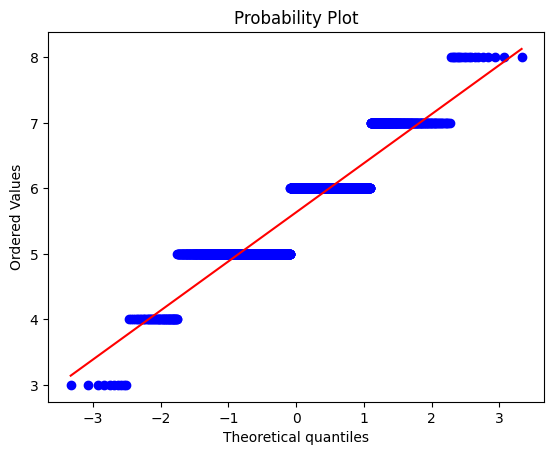

In [49]:
stats.probplot(df.quality, plot = plt)

In [51]:
x = df.drop("quality", axis = 1)
y = df.quality

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [55]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
y_pred

array([5.31604945, 5.01510456, 5.68127734, 5.42850337, 5.69164445,
       5.24334899, 5.00005089, 5.07336691, 5.76075607, 5.66582592,
       6.07737057, 5.21963144, 5.54618858, 5.24281413, 5.42689969,
       6.40764925, 5.10642483, 5.56389126, 6.55634458, 5.32781197,
       5.32155037, 5.18606632, 5.8931055 , 6.30148969, 5.33279373,
       5.43257911, 6.33070482, 5.3076262 , 5.17748578, 6.19154899,
       5.22213144, 5.45658591, 5.7577219 , 5.36183832, 5.45062475,
       4.99428909, 6.16712124, 5.6926719 , 5.61976103, 6.11944753,
       5.50931028, 5.21590148, 6.18227967, 5.14665681, 5.88729797,
       5.84005214, 6.45367167, 5.60532282, 5.10424797, 5.53176658,
       5.19220769, 4.96207916, 5.53005331, 6.33877243, 4.93841224,
       4.9672789 , 6.00389345, 5.39481548, 5.79772473, 5.23790835,
       5.57904953, 5.93851115, 5.25124515, 5.2864384 , 6.45268358,
       5.39491056, 6.29774203, 5.2559574 , 6.41541504, 5.29541354,
       6.35315486, 4.72046593, 5.81225746, 5.77575218, 6.12855

In [56]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [58]:
mse = mean_squared_error(y_test, y_pred)
mse

0.39078829344525523

In [59]:
r2 = r2_score(y_test, y_pred)
r2

0.40201256371442884